# Task: Covid-19 Data Analysis
### This notebook is used to understand the comprehension of Data Analysis techniques using Pandas library.

## By: Syed Hamza Ali
## Student Number: 101535231

### Data Source: 
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports

### File naming convention

MM-DD-YYYY.csv in UTC.

### Field description

- Province_State: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.

- Country_Region: country/region name conforming to WHO (will be updated).

- Last_Update: MM/DD/YYYY HH:mm (24 hour format, in UTC).

- Confirmed: the number of confirmed cases. For Hubei Province: from Feb 13 (GMT +8), we report both clinically diagnosed and lab-confirmed cases. For lab-confirmed cases only (Before Feb 17), please refer to who_covid_19_situation_reports. For Italy, diagnosis standard might be changed since Feb 27 to "slow the growth of new case numbers." (Source)

- Deaths: the number of deaths.

- Recovered: the number of recovered cases.

# Imports

In [1]:
import pandas as pd 
import numpy as np 

### Question 1

#### Read the dataset

In [2]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-15-2021.csv'
dataset = pd.read_csv(url)

#### Display the top 5 rows in the data

In [3]:
dataset.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-04-16 04:20:46,33.93911,67.709953,57534,2533,52083.0,2918.0,Afghanistan,147.794636,4.402614
1,NaN,NaN,NaN,Albania,2021-04-16 04:20:46,41.15330,20.168300,129128,2335,100013.0,26780.0,Albania,4487.038710,1.808283
2,NaN,NaN,NaN,Algeria,2021-04-16 04:20:46,28.03390,1.659600,119142,3144,83048.0,32950.0,Algeria,271.697072,2.638868
3,NaN,NaN,NaN,Andorra,2021-04-16 04:20:46,42.50630,1.521800,12641,121,11989.0,531.0,Andorra,16360.577234,0.957203
4,NaN,NaN,NaN,Angola,2021-04-16 04:20:46,-11.20270,17.873900,23951,557,22175.0,1219.0,Angola,72.874109,2.325581


#### Show the information of the dataset

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4014 entries, 0 to 4013
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3266 non-null   float64
 1   Admin2               3271 non-null   object 
 2   Province_State       3835 non-null   object 
 3   Country_Region       4014 non-null   object 
 4   Last_Update          4014 non-null   object 
 5   Lat                  3924 non-null   float64
 6   Long_                3924 non-null   float64
 7   Confirmed            4014 non-null   int64  
 8   Deaths               4014 non-null   int64  
 9   Recovered            737 non-null    float64
 10  Active               737 non-null    float64
 11  Combined_Key         4014 non-null   object 
 12  Incident_Rate        3924 non-null   float64
 13  Case_Fatality_Ratio  3968 non-null   float64
dtypes: float64(7), int64(2), object(5)
memory usage: 439.2+ KB


#### Show the sum of missing values of features in the dataset

In [5]:
dataset.isnull().sum()

FIPS                    748
Admin2                  743
Province_State          179
Country_Region            0
Last_Update               0
Lat                      90
Long_                    90
Confirmed                 0
Deaths                    0
Recovered              3277
Active                 3277
Combined_Key              0
Incident_Rate            90
Case_Fatality_Ratio      46
dtype: int64

### Question 2

#### Show the number of Confirmed cases by Country

In [6]:
confirmed_cases_column = ['Country_Region', 'Confirmed']
confirmed_df = dataset[confirmed_cases_column]
confirmed_df

,Country_Region,Confirmed
0,Afghanistan,57534
1,Albania,129128
2,Algeria,119142
3,Andorra,12641
4,Angola,23951
...,...,...
4009,Ukraine,0
4010,Nauru,0
4011,New Zealand,0
4012,Tuvalu,0


#### Show the number of Deaths by Country

In [7]:
death_cases_column = ['Country_Region', 'Deaths']
deaths_df = dataset[death_cases_column]
deaths_df

,Country_Region,Deaths
0,Afghanistan,2533
1,Albania,2335
2,Algeria,3144
3,Andorra,121
4,Angola,557
...,...,...
4009,Ukraine,0
4010,Nauru,0
4011,New Zealand,0
4012,Tuvalu,0


#### Show the number of Recovered cases by Country

In [8]:
recovered_cases_column = ['Country_Region', 'Recovered']
recov_df = dataset[recovered_cases_column]
recov_df

,Country_Region,Recovered
0,Afghanistan,52083.0
1,Albania,100013.0
2,Algeria,83048.0
3,Andorra,11989.0
4,Angola,22175.0
...,...,...
4009,Ukraine,0.0
4010,Nauru,0.0
4011,New Zealand,0.0
4012,Tuvalu,0.0


#### Show the number of Active Cases by Country

In [9]:
active_cases_column = ['Country_Region', 'Active']
active_df = dataset[active_cases_column]
active_df

,Country_Region,Active
0,Afghanistan,2918.0
1,Albania,26780.0
2,Algeria,32950.0
3,Andorra,531.0
4,Angola,1219.0
...,...,...
4009,Ukraine,0.0
4010,Nauru,0.0
4011,New Zealand,0.0
4012,Tuvalu,0.0


#### Show the latest number of Confirmed, Deaths, Recovered and Active cases Country-wise

In [10]:
all_cases_column = ['Country_Region','Confirmed','Deaths','Recovered','Active']
df1 = dataset[all_cases_column]
# Filtering further to clean data
df1[df1['Confirmed'] != 0]

,Country_Region,Confirmed,Deaths,Recovered,Active
0,Afghanistan,57534,2533,52083.0,2918.0
1,Albania,129128,2335,100013.0,26780.0
2,Algeria,119142,3144,83048.0,32950.0
3,Andorra,12641,121,11989.0,531.0
4,Angola,23951,557,22175.0,1219.0
...,...,...,...,...,...
3999,Malaysia,39418,130,37847.0,1441.0
4000,Malaysia,2417,12,2386.0,19.0
4001,Malaysia,1261,9,1150.0,102.0
4006,United Kingdom,3230,69,0.0,0.0


### Note: The Dataset contained mostly US states/location, therefore if the Dataset was meant to be used by country and reduced in size, then summing all US cases could have been done like this

In [11]:
summed_us_df = df1.groupby('Country_Region')[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()
summed_us_df

,Country_Region,Confirmed,Deaths,Recovered,Active
0,Afghanistan,57534,2533,52083.0,2918.0
1,Albania,129128,2335,100013.0,26780.0
2,Algeria,119142,3144,83048.0,32950.0
3,Andorra,12641,121,11989.0,531.0
4,Angola,23951,557,22175.0,1219.0
...,...,...,...,...,...
196,West Bank and Gaza,276407,2937,241343.0,32127.0
197,Winter Olympics 2022,0,0,0.0,0.0
198,Yemen,5657,1097,2178.0,2382.0
199,Zambia,90532,1230,88283.0,1019.0


### Question 3

### Show the countries with no recovered cases

In [12]:
no_recov_df = recov_df[recov_df['Recovered'] == 0]
no_recov_df

,Country_Region,Recovered
9,Australia,0.0
23,Belgium,0.0
24,Belgium,0.0
25,Belgium,0.0
26,Belgium,0.0
...,...,...
4009,Ukraine,0.0
4010,Nauru,0.0
4011,New Zealand,0.0
4012,Tuvalu,0.0


#### Show the countries with no confirmed cases

In [13]:
no_confirmed_df = confirmed_df[confirmed_df['Confirmed'] == 0]
no_confirmed_df

,Country_Region,Confirmed
78,Canada,0
175,Colombia,0
282,India,0
416,Mexico,0
488,Peru,0
615,Spain,0
703,US,0
715,US,0
724,US,0
747,US,0


#### Show the countries with no deaths

In [14]:
no_deaths_df = deaths_df[deaths_df['Deaths'] == 0]
no_deaths_df

,Country_Region,Deaths
10,Australia,0
23,Belgium,0
24,Belgium,0
25,Belgium,0
26,Belgium,0
...,...,...
4009,Ukraine,0
4010,Nauru,0
4011,New Zealand,0
4012,Tuvalu,0


In [15]:
#Creating another subset of columns to be shown
all_cases_column2 = ['Country_Region','Confirmed','Deaths','Recovered']
df2 = dataset[all_cases_column2]
no_death_df2 = df2[(df2['Deaths'] == 0) & (df2['Confirmed'] != 0)]
no_death_df2

,Country_Region,Confirmed,Deaths,Recovered
10,Australia,113,0,107.0
23,Belgium,119354,0,0.0
24,Belgium,116357,0,0.0
25,Belgium,107575,0,0.0
26,Belgium,71896,0,0.0
...,...,...,...,...
3781,US,271,0,NaN
3957,United Kingdom,25,0,22.0
3963,United Kingdom,62,0,55.0
3968,United Kingdom,4,0,4.0


### Question 4

#### Show the Top 10 countries with Confirmed cases

In [16]:
summed_us_df.nlargest(10,'Confirmed')

,Country_Region,Confirmed,Deaths,Recovered,Active
186,US,31614987,561420,0.0,0.0
80,India,14291917,174308,12547866.0,1569743.0
24,Brazil,13759207,365935,12084851.0,1296386.0
63,France,5248857,100233,323865.0,4824759.0
147,Russia,4622464,102667,4252526.0,267271.0
190,United Kingdom,4396095,153645,13854.0,4254804.0
184,Turkey,4086957,35031,3535040.0,516886.0
86,Italy,3826156,115937,3200196.0,510023.0
167,Spain,3396685,76882,150376.0,3169427.0
67,Germany,3084129,79381,2747460.0,283120.0


#### Show the Top 10 Countries with Active cases

In [17]:
summed_us_df.nlargest(10,'Active')

,Country_Region,Confirmed,Deaths,Recovered,Active
63,France,5248857,100233,323865.0,4824759.0
190,United Kingdom,4396095,153645,13854.0,4254804.0
167,Spain,3396685,76882,150376.0,3169427.0
117,Mexico,2295435,211213,1820959.0,2084222.0
80,India,14291917,174308,12547866.0,1569743.0
141,Peru,1667737,154885,1592937.0,1512852.0
128,Netherlands,1402433,17063,19908.0,1365462.0
24,Brazil,13759207,365935,12084851.0,1296386.0
17,Belgium,939309,23636,0.0,921644.0
172,Sweden,892480,13761,0.0,878719.0


### Question 5

#### Plot Country-wise Total deaths, confirmed, recovered and active cases where total deaths have exceeded 50,000

In [18]:
import matplotlib.pyplot as plt

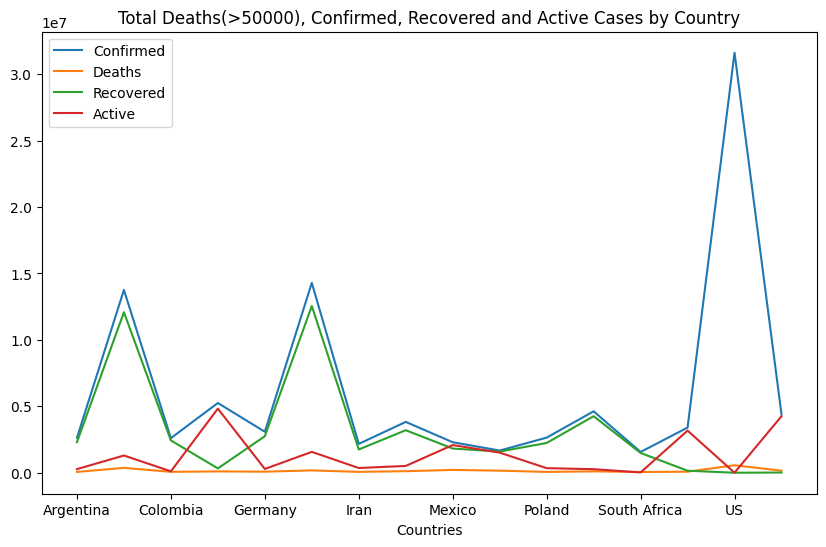

In [19]:
plot_df = summed_us_df[summed_us_df['Deaths'] > 50000]

fig, ax = plt.subplots(figsize =(10,6))
plot_df.set_index('Country_Region')[['Confirmed','Deaths','Recovered','Active']].plot(kind='line',ax=ax)
plt.title('Total Deaths(>50000), Confirmed, Recovered and Active Cases by Country')
plt.xlabel('Countries')
plt.show()

### Question 6

### Plot Province/State wise Deaths in USA

In [20]:
import plotly.express as px

In [21]:
covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-09-2021.csv')

In [22]:
covid_data.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')

In [23]:
df6 = covid_data[covid_data['Country_Region'] == 'US']
sum_df6 = df6.groupby('Province_State')[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()

fig = px.bar(sum_df6, x='Province_State', y='Deaths', 
             title = 'State wise deaths reported of COVID-19 USA', 
             text='Deaths')
fig.show()

### Question 7

### Plot Province/State Wise Active Cases in USA

In [24]:
fig = px.bar(sum_df6, x='Province_State', y='Active', 
             title = 'State wise Active cases reported of COVID-19 USA', 
             text='Active')
fig.show()

### Question 8

### Plot Province/State Wise Confirmed cases in USA

In [25]:
fig = px.bar(sum_df6, x='Province_State', y='Confirmed', 
             title = 'State wise Confirmed reported of COVID-19 USA', 
             text='Confirmed')
fig.show()

### Combined Bar Graph

In [26]:
fig = px.bar(sum_df6, x='Province_State', y=['Confirmed', 'Deaths', 'Recovered', 'Active'], 
             title = 'State wise Confirmed cases reported of COVID-19 USA',
             barmode='group')
fig.show()

### Question 9

### Plot Worldwide Confirmed Cases over time

In [27]:
import plotly.express as px
import plotly.io as pio

In [28]:
time_df = covid_data.groupby('Last_Update')['Confirmed'].sum().reset_index()

fig = px.line(time_df, x='Last_Update', y='Confirmed', 
              title='Worldwide Confirmed Novel COVID-19 Cases Over Time')

pio.show(fig)